In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('data1.csv')
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [29]:
null_count = data.isnull().sum()
null_count[null_count>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [30]:
data = data.fillna(data.mean())
null_count = data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [31]:
x = data.iloc[:,1:-1] # ignore first column (Id) and last column (Outcome)
y = data['Target']

In [37]:
# replace all 'yes' and 'no' strings with 1 and 0
x['dependency'].replace(to_replace={'yes':1, 'no':0},inplace=True)
x['edjefe'].replace(to_replace={'yes':1, 'no':0},inplace=True)
x['edjefa'].replace(to_replace={'yes':1, 'no':0},inplace=True)

In [38]:
x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['idhogar'] = le.fit_transform(x['idhogar'])

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
xtrain.shape

(7645, 141)

In [50]:
xtest.shape

(1912, 141)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)

0.9377615062761506


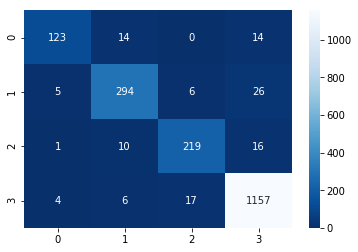

In [67]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(xtrain,ytrain)
rf_model.score(xtest,ytest)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9048117154811716

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(xtrain,ytrain)
ab_model.score(xtest,ytest)

0.6647489539748954

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gb_model.fit(xtrain,ytrain)
gb_model.score(xtest,ytest)

0.6542887029288703